## 1. Work overview
<p><ul>
    <li>Our goal was to create new columns based on the content of the tweets, in order to create a predictive model.There are no null inputs inthe dataset,which means there was no need for cleaning the data.</li>
  <li>at first a new column "words per tweet" of each person was calculated. using lambda function(This function can have any   number of arguments but only one expression, which is evaluated and returned).</li>
  <li>a violinplot was generated to see the word counts of each personality type. using seaborn- python visualization library
  <li>few more columns are created calculating the amount of "?,HTTP,MUSIC,IMAGE,!,..." per tweet THESE ARE THE FEATURES.</li>
  <li>correlations between each of these features and 'words per tweet' was calculated,correlation between'ellipses per tweet & 'words per tweet' is the highest</li>
  <li>so correlation between 'words per tweet' & 'ellipsis per tweet' of each personality types are shown using jointplots-     Seaborn’s jointplot displays a relationship between 2 variables by calculating their correlation coefficient.</li>
  <li>scatter plot of 'words per tweet' & 'ellipsis per tweet' of each personality types</li>
  <li>then the three algorithms were applied. but the accuracy of predicting 16 different personalities were low </li>
  <li>so perform machine learning with the introverted/extroverted column</li>
</ul></p>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 2. Feature Extraction 
<p>Calculating words per tweets</p>

In [3]:
df = pd.read_csv('mbti_1.csv')
print(df.head(10))
print("*"*40)
print(df.info())
pd.set_option('display.max_columns', 500)
#WORDS PER TWEET CALCULATION**
df['words_per_tweet'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB
None
   type                                              posts  words_per_tweet
0  INFJ  'http://www.

## 3. Exploratory Data Analysis
<p>violin plot showing words per tweet of each personalty type</p>

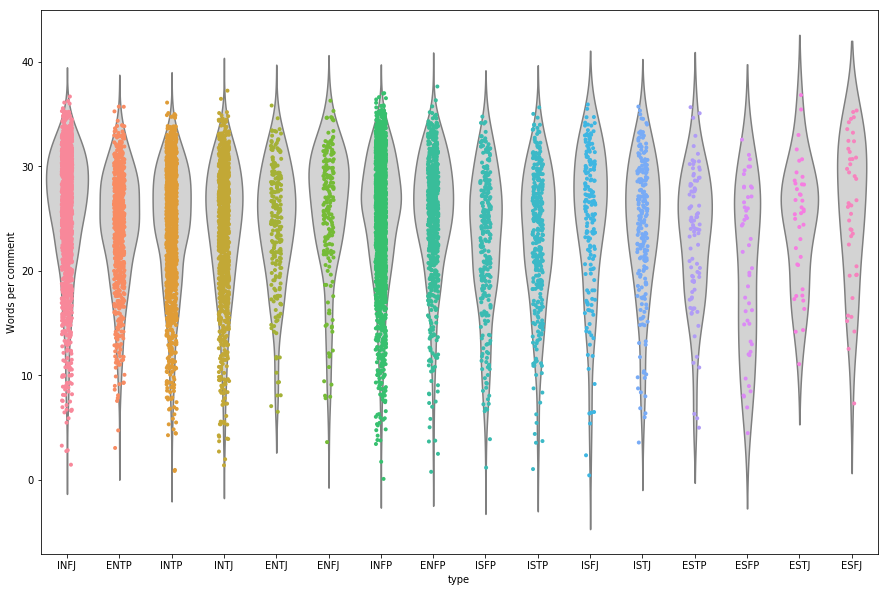

In [4]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_tweet', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_tweet', data=df, size=4, jitter=True)
plt.ylabel('Words per tweet')
plt.show()

 <p>New columns showing the amount of "?, HTTP,MUSIC,IMAGE,!,..." per tweet, these are the features</p>

In [6]:
df['http_per_tweet'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_tweet'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_tweet'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_tweet'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_tweet'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_tweet'] = df['posts'].apply(lambda x: x.count('...')/50)
pd.set_option('display.max_columns', 500)
print(df.head())

   type                                              posts  words_per_tweet  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...            11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...            23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...            16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...            21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...            19.34   

   http_per_tweet  music_per_tweet  question_per_tweet  img_per_tweet  \
0            0.48             0.02                0.36           0.12   
1            0.20             0.00                0.10           0.02   
2            0.10             0.00                0.24           0.00   
3            0.04             0.02                0.22           0.00   
4            0.12             0.02                0.20           0.04   

   excl_per_tweet  ellipsis_per_tweet  
0            0.06                0.30  
1     

<p>Jointplots to visualize the correlation between other features and words per tweet.</p>

C:\Users\Orchi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x720 with 0 Axes>

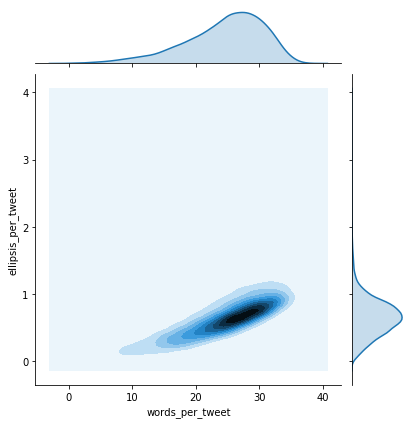

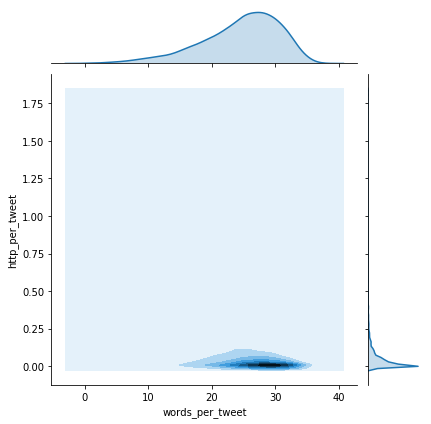

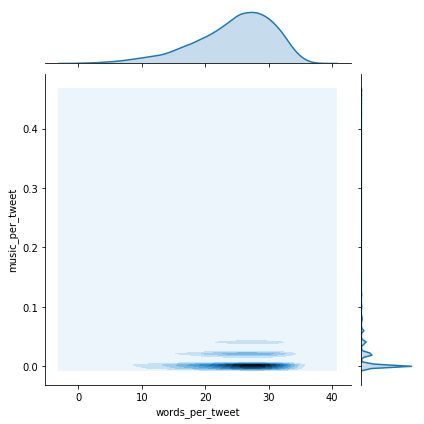

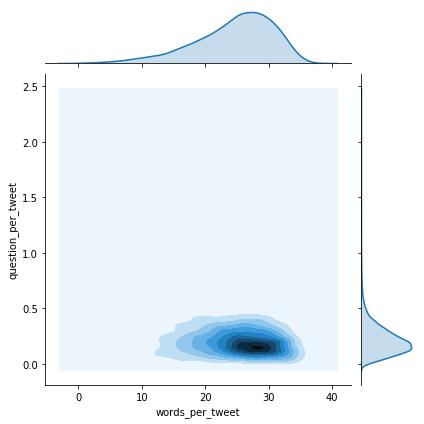

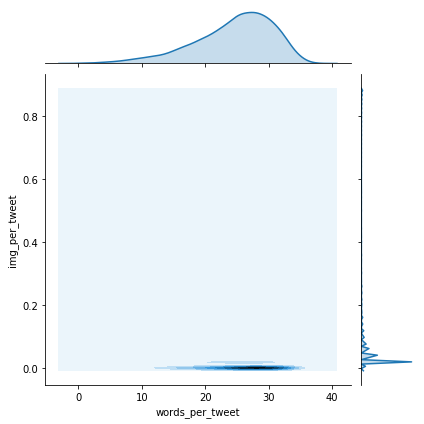

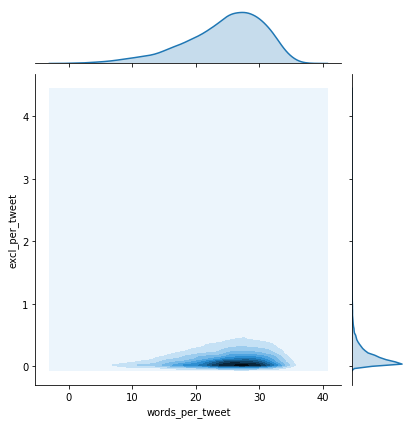

In [7]:
plt.figure(figsize=(15,10))
sns.jointplot(x='words_per_tweet', y='ellipsis_per_tweet', data=df, kind='kde')
sns.jointplot(x='words_per_tweet', y='http_per_tweet', data=df, kind='kde')
sns.jointplot(x='words_per_tweet', y='music_per_tweet', data=df, kind='kde')
sns.jointplot(x='words_per_tweet', y='question_per_tweet', data=df, kind='kde')
sns.jointplot(x='words_per_tweet', y='img_per_tweet', data=df, kind='kde')
sns.jointplot(x='words_per_tweet', y='excl_per_tweet', data=df, kind='kde')

<p>Since there is large correlation between words per tweet and  ellipsis per tweet, to see the correlation between words per tweet & ellipsis per tweet of each personality type, more jointplots are generated.</p>

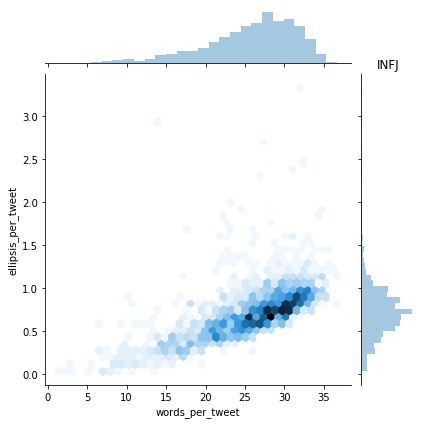

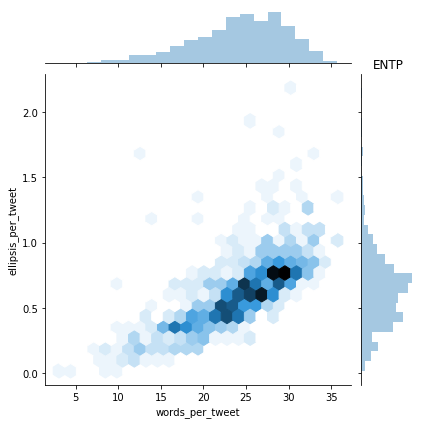

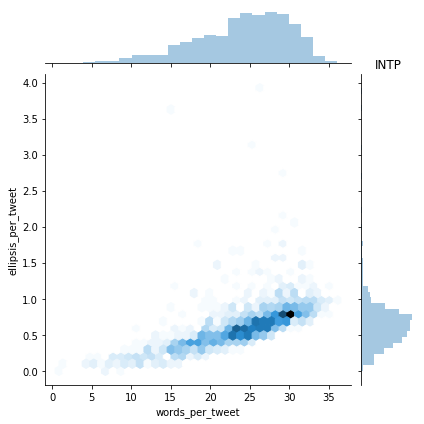

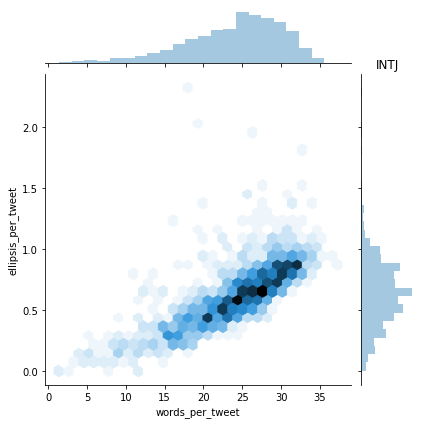

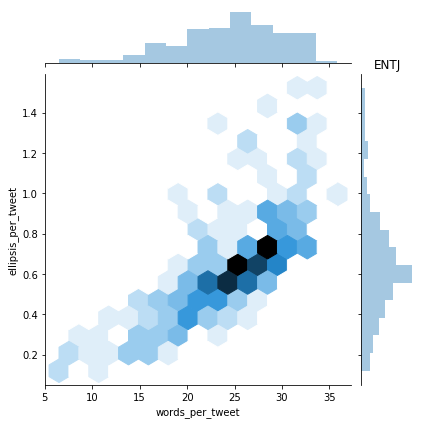

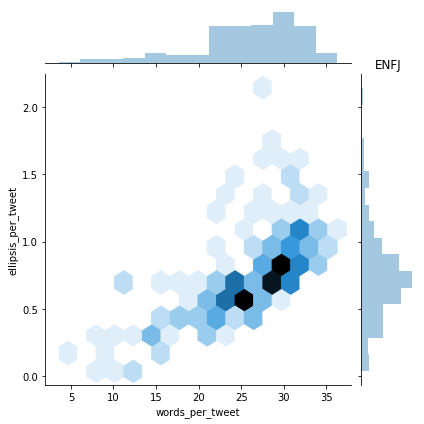

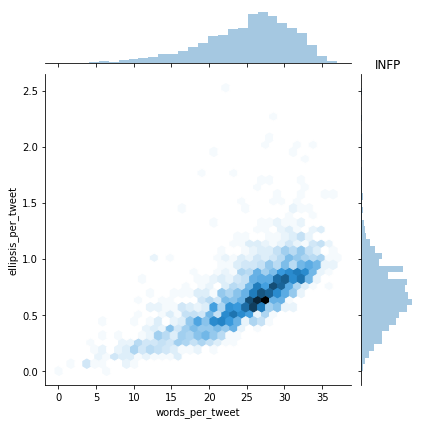

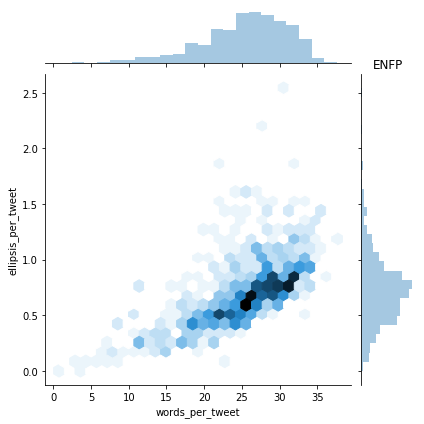

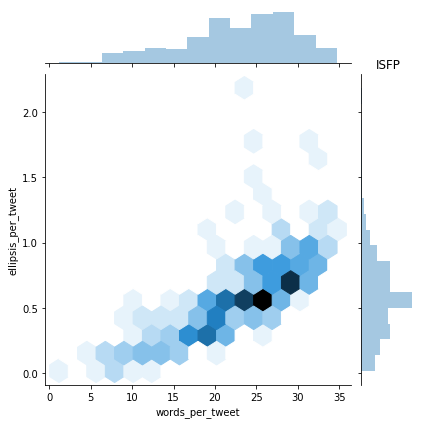

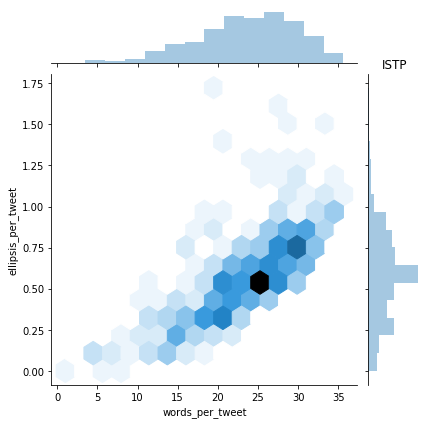

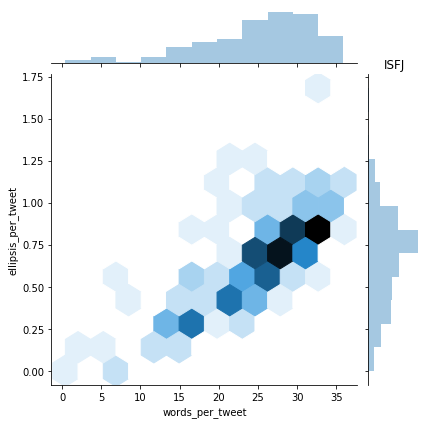

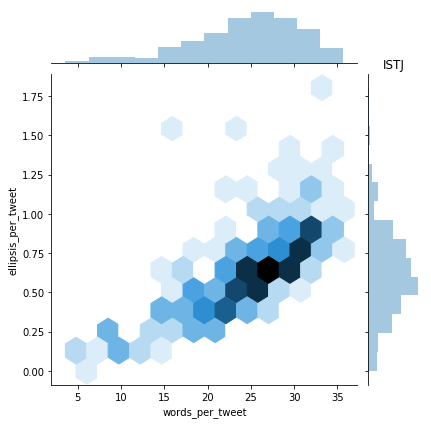

In [8]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        sns.jointplot(x='words_per_tweet', y='ellipsis_per_tweet', data=df_2, kind="hex")
        plt.title(i[k])
        k+=1

<p>scatterplot of all personality types and corresponding words per tweet & ellipsis per tweet correlation</p>

0.6399820319539542
0.7054114704760908
0.6417417099995272
0.7418360967765789
0.7423804864273493
0.6701370930896875
0.7223598412495943
0.64210438310988
0.7239129106930459
0.7305845421989159
0.760423088098855
0.6974642499076579
[0.760423088098855, 0.7423804864273493, 0.7418360967765789, 0.7305845421989159, 0.7239129106930459, 0.7223598412495943, 0.7054114704760908, 0.6974642499076579, 0.6701370930896875, 0.64210438310988, 0.6417417099995272, 0.6399820319539542]
['INFJ', 'INTP', 'ENFP', 'ENFJ', 'ISTJ', 'ENTP', 'INFP', 'ISFP', 'ISTP', 'INTJ', 'ENTJ', 'ISFJ']


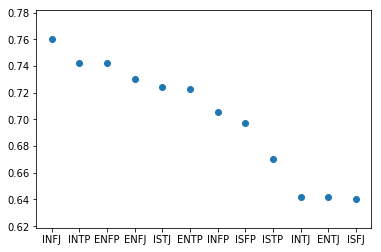

In [10]:
i = df['type'].unique()
k = 0
TypeArray = []
PearArray=[]
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]]
        pearsoncoef1=np.corrcoef(x=df_2['words_per_tweet'], y=df_2['ellipsis_per_tweet'])
        pear=pearsoncoef1[1][0]
        print(pear)
        TypeArray.append(i[k])
        PearArray.append(pear)
        k+=1
TypeArray = [x for _,x in sorted(zip(PearArray,TypeArray))]
PearArray = sorted(PearArray, reverse=True)
print(PearArray)
print(TypeArray)
plt.scatter(TypeArray, PearArray)


## 4.More Data preprocessing
<p>4 new columns dividing the people by introversion/extroversion, intuition/sensing like a binary code to turn the categorical personality types into numerical values</p>

In [11]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(10))

   type                                              posts  words_per_tweet  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...            11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...            23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...            16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...            21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...            19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...            29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...            26.58   
7  INTJ  'I tend to build up a collection of things on ...            24.46   
8  INFJ  I'm not sure, that's a good question. The dist...            14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...            24.66   

   http_per_tweet  music_per_tweet  question_per_tweet  img_per_tweet  \
0            0.48             0.02                0.36   

## 5. Implementing Machine Learning Algorithms
<p>Building machine learning algorithms first with the entire type column, with different models.</p>

In [8]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state=5)


(8675,)
(8675, 1)


## Random Forest Classifier
<p>With default parameters.</p>

In [9]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

37.72 %


## Hyperparameter tuning
<p>First the parameters used by currents forest are listed.</p>

In [10]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(random_forest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


<p>Parmeter grid for RandomizedSearchCV.</p>

In [11]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


<p>Random grid is used to search for best hyperparameters.</p>
<p>Random search of parameters, using 3 fold cross validation, 
 search across 100 different combinations, and use all available cores</p>

In [15]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)
#list of best parameters
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [13]:
#list of best parameters
rf_random.best_params_
#test with tuned parameters
best_random = rf_random.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
## Logistic Regression
<p>With default parameters.</p>

In [14]:
#  try with solver='lbfgs', multiclass='ovr'
logreg = LogisticRegression(solver='liblinear', multi_class='auto')
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")


21.07 %


In [16]:
#check list of parameters in use
print('Parameters currently in use:\n')
pprint(logreg.get_params())


Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [21]:
#hyperparameter tuning usung gridsearchcv
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg2=LogisticRegression(solver='liblinear', multi_class='auto')
logreg_cv=GridSearchCV(logreg2,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters: ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.21122069937235813


In [22]:
#test with tuned parameters
logreg3 = LogisticRegression(C=0.001,penalty='l2' ,solver='liblinear', multi_class='auto')
logreg3.fit(X_train, y_train)
Y_pred3 = logreg3.predict(X_test)
#new accuracy 
acc_log3 = round(logreg3.score(X_train, y_train) * 100, 2)
print(round(acc_log3,2,), "%")

21.11 %


## k Nearest Neighbors
<p>With default parameters.</p>

In [15]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")


46.62 %


The optimal number of neighbors is 41


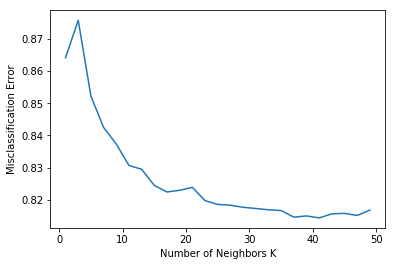

In [25]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn2, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()    

In [29]:
#test with tuned parameters
knn3 = KNeighborsClassifier(n_neighbors = 41)
knn3.fit(X_train, y_train)

Y_pred3 = knn3.predict(X_test)
#new accuracy 
acc_knn3 = round(knn3.score(X_train, y_train) * 100, 2)
print(round(acc_knn3,2,), "%")

24.53 %


<p>Now machine learning with only introverted/extroverted column, to if if the model is able to classify if someone is introverted or extroverted with a higher precision..</p>

In [30]:
XX = df.drop(['type','posts','I-E'], axis=1).values
yy = df['I-E'].values

print(yy.shape)
print(XX.shape)

XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size = 0.1, random_state=5)


(8675,)
(8675, 4)


In [17]:
#Random Forest
random_forestt = RandomForestClassifier(n_estimators=100)
random_forestt.fit(XX_train, yy_train)

Y_predictionn = random_forestt.predict(XX_test)

random_forestt.score(XX_train, yy_train)
acc_random_forestt = round(random_forestt.score(XX_train, yy_train) * 100, 2)
print(round(acc_random_forestt,2,), "%")

100.0 %


In [21]:
# Logistic Regression
logregg = LogisticRegression(solver='liblinear')
logregg.fit(XX_train, yy_train)

Y_predd = logregg.predict(XX_test)

acc_logg = round(logregg.score(XX_train, yy_train) * 100, 2)
print(round(acc_logg,2,), "%")

77.1 %


In [22]:
# KNN
knnn = KNeighborsClassifier(n_neighbors = 3)
knnn.fit(XX_train, yy_train)

Y_predd = knnn.predict(XX_test)

acc_knnn = round(knnn.score(XX_train, yy_train) * 100, 2)
print(round(acc_knnn,2,), "%")

83.66 %
